Comparison of Probabilistic PCA (PPCA) and Bayesian Probabilistic PCA (BPPCA) for dimensionality reduction.

*References*
* Bishop, C. M. (1999). Variational principal components. 9th International Conference on Artificial Neural Networks: ICANN ’99, 1999, 509–514. doi:10.1049/cp:19991160
* Tipping, M. E., & Bishop, C. M. (1999). Probabilistic Principal Component Analysis, 611–622.

In [372]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [373]:
import numpy as np
import sklearn.datasets as ds
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as plt_cm
import matplotlib.colors as plt_col

In [374]:
os.sys.path.append('../src/')
import pca

In [375]:
def plot_scatter(x, classes, ax=None):
    ax = plt.gca() if ax is None else ax
    cmap = plt_cm.jet
    norm = plt_col.Normalize(vmin=np.min(classes), vmax=np.max(classes))
    mapper = plt_cm.ScalarMappable(cmap=cmap, norm=norm)
    colors = mapper.to_rgba(classes)
    ax.scatter(x[0, :], x[1, :], color=colors, s=20)

def plot_digits(x, classes, ax=None):
    xx = x[0, :]
    yy = x[1, :]
    width = np.max(xx) - np.min(xx)
    height = np.max(yy) - np.min(yy)
    ax = plt.gca() if ax is None else ax
    ax.set_xlim([np.min(xx) - 0.1 * width, np.max(xx) + 0.1 * width])
    ax.set_ylim([np.min(yy) - 0.1 * height, np.max(yy) + 0.1 * height])
    cmap = plt_cm.jet
    norm = plt_col.Normalize(vmin=0, vmax=9)
    mapper = plt_cm.ScalarMappable(cmap=cmap, norm=norm)
    colors = mapper.to_rgba(range(10))
    for x1, x2, digit in zip(xx, yy, classes):
        ax.text(x1, x2, digit, color=colors[int(digit)])
         
def plot_mse(mse):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(mse, linewidth=2, marker='s',markersize=5, markerfacecolor='red')
    ax.grid()
    ax.set_xlabel('Iteration')
    ax.set_ylabel('MSE')
    
def plot_grid(n, ncols=4, size=(5, 5)):
    nrows = int(np.ceil(n/float(ncols)))
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(size[0]*ncols, size[1]*nrows))
    ax = ax.ravel()
    return [fig, ax]

def plot_bppca(y, y_classes, maxit=7, *args, **kwargs):
    np.random.seed(0)
    bppca = pca.bppca.BPPCA(y, *args, **kwargs)
        
    fig, ax = plot_grid(maxit + 1)
    mse = [bppca.mse()]
    plot_scatter(bppca.transform(), y_classes, ax[0])
    for i in xrange(maxit):
        bppca.update()
        mse.append(bppca.mse())
        j = i + 1
        plot_scatter(bppca.transform(), y_classes, ax[j])
        ax[j].set_title('Iteration {}'.format(j))
    plot_mse(mse)
    return bppca

In [3]:
import sklearn.datasets as ds
import numpy as np
iris = ds.load_iris()
iris_y = np.transpose(iris.data)
iris_classes = iris.target
print(np.mean(iris))
sys.exit()

TypeError: unsupported operand type(s) for /: 'Bunch' and 'int'

In [377]:
ppca = pca.ppca.PPCA()
ppca.fit(iris_y)

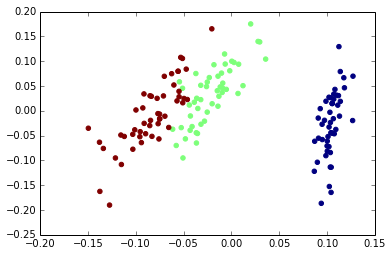

In [378]:
plot_scatter(ppca.transform(), iris_classes)

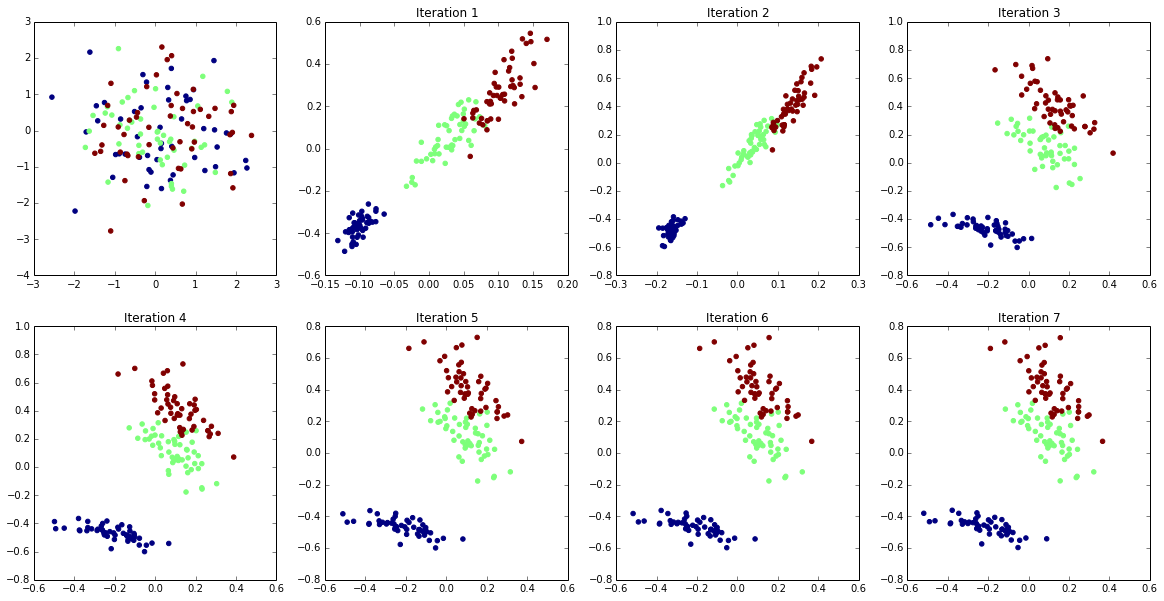

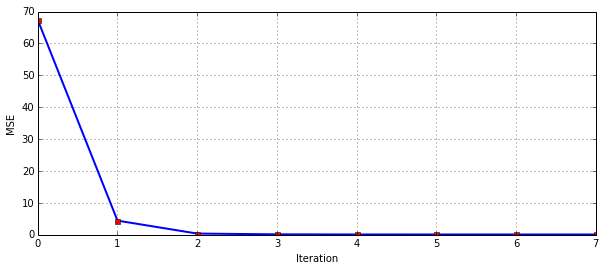

In [379]:


bppca = plot_bppca(iris_y, iris_classes)

In [380]:
def simulate(n=100, p=10, q=2, mu_fill=0.0, sigma=0.0, n_classes=2):
    classes = np.empty(n, np.int)
    samples_per_class = n / n_classes
    cur_class = 0
    for i in xrange(n):
        classes[i] = cur_class
        if (i + 1) % samples_per_class == 0:
            cur_class +=1
    # w        
    w = np.empty([p, q])
    weights = np.arange(p) + 2
    np.random.shuffle(weights)
    for i in xrange(p):
        w[i, :] = np.random.normal(weights[i], 0.1, q) 
    # x
    class_factors = np.random.randint(-50, +50, q * n_classes).reshape(q, n_classes)
    x = np.empty([q, n])
    for i in xrange(n):
        factors = class_factors[:, classes[i]]
        for j in xrange(q):
            x[j, i] = np.random.normal(factors[j], 5.0, 1)
    # mu
    mu = np.empty((p, 1))
    mu.fill(mu_fill)
    # sigma
    if sigma == 0.0:
        noise = np.zeros([p, n])
    else:
        noise = np.random.normal(0.0, sigma, p * n).reshape(p, n)

    y = w.dot(x) + mu + noise
    return [y, w, x, mu, noise, classes]

In [381]:
np.random.seed(0)
[sim_y, sim_w, sim_x, sim_mu, sim_noise, sim_classes] = simulate(n=100, p=10, q=2, mu_fill=20.0, sigma=1.0, n_classes=5)

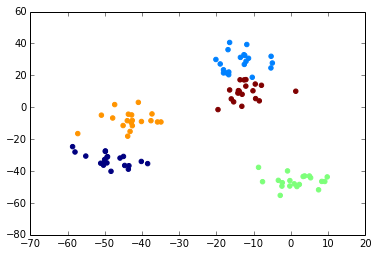

In [382]:
plot_scatter(sim_x, sim_classes)

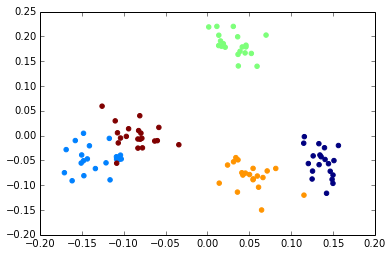

In [383]:
ppca = pca.ppca.PPCA()
ppca.fit(sim_y)
plot_scatter(ppca.transform(), sim_classes)

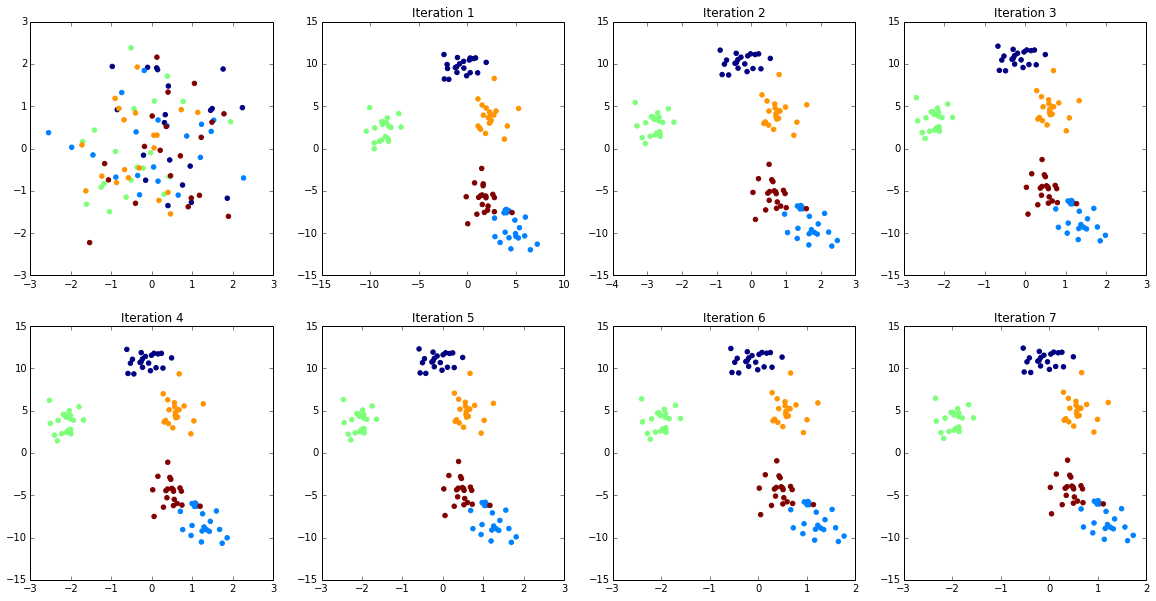

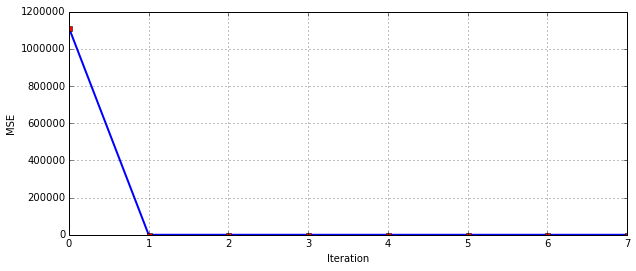

In [384]:
bppca = plot_bppca(sim_y, sim_classes)

In [385]:
np.random.seed(0)
digits = ds.load_digits()
digits_i = np.random.choice(range(digits.data.shape[0]), 100)
digits_y = np.transpose(digits.data[digits_i, :])
digits_classes = digits.target[digits_i]

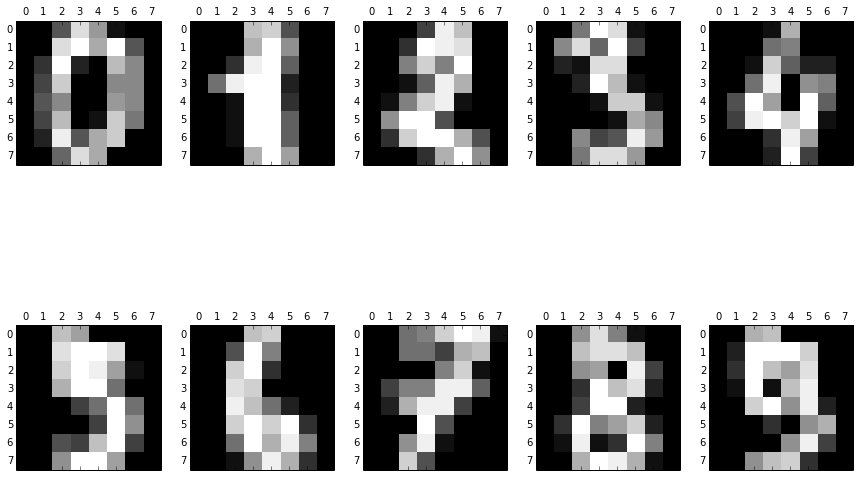

In [387]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=[15, 10])
ax = ax.flatten()
for i in xrange(10):
    ax[i].matshow(digits.images[i], cmap=plt_cm.gray)

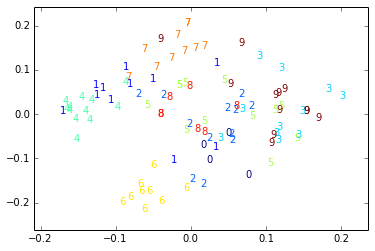

In [388]:
ppca = pca.ppca.PPCA()
ppca.fit(digits_y)
plot_digits(ppca.transform(), digits_classes)

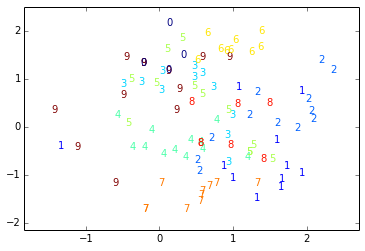

In [389]:
np.random.seed(0)
bppca = pca.bppca.BPPCA(digits_y)
bppca.fit(maxit=4)
plot_digits(bppca.transform(), digits_classes)

In [390]:
np.random.seed(0)
[ard_y, ard_w, ard_x, ard_mu, ard_noise, ard_classes] = simulate(n=100, p=10, q=4, mu_fill=0.0, sigma=0.0, n_classes=5)

In [391]:
def plot_alpha(alpha, ax=None):
    ax = plt.gca() if ax is None else ax
    ax.bar(np.arange(len(alpha)), alpha)
    
def plot_weights(weights, ax=None):
    ax = plt.gca() if ax is None else ax
    ax.boxplot(weights)

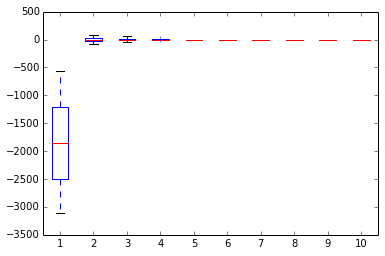

In [392]:
ppca = pca.ppca.PPCA(q=10)
ppca.fit(ard_y)
plot_weights(ppca.w)

In [393]:
np.random.seed(0)
bppca = pca.bppca.BPPCA(ard_y, q=10)
bppca.hyper.alpha_a = 1
bppca.hyper.alpha_b = 1
q = bppca.q_dist
for i in xrange(10):
    bppca.update()

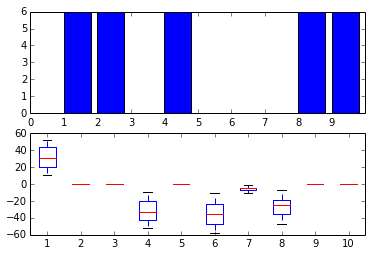

In [394]:
fig, ax = plt.subplots(nrows=2, ncols=1)
for a in ax:
    a.set_xlim([0, 10])
    a.set_xticks(range(10))
plot_alpha(bppca.q_dist.alpha_mean(), ax[0])
plot_weights(bppca.q_dist.w_mean, ax[1])